In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import statsmodels.api as sm
import math
from statsmodels import regression
import matplotlib.pyplot as plt

In [8]:
def linreg(X,Y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y,X).fit()
    a = model.params[0]
    b= model.params[1]
    X = X.iloc[:,1]
    X2 = np.linspace(X.min(),X.max(),100)
    Y_hat = a + b*X2
    plt.scatter(X,Y,alpha=0.3)
    plt.plot(X2,Y_hat,'r',alpha=0.9)
    plt.xlabel('X-Value/Asset')
    plt.ylabel('Y-Value/benchmark')
    return model.summary()

In [10]:
tsla = pdr.get_data_yahoo('TSLA',start='2014-1-1', end='2014-12-31')
benchmark = pdr.get_data_yahoo('SPY', start='2014-1-1', end = '2014-12-31')
tsla = tsla['Close']
benchmark = benchmark['Close']
tsla_ret = tsla.pct_change()[1:]
benchmark_ret = benchmark.pct_change()[1:]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     64.79
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           3.43e-14
Time:                        10:20:26   Log-Likelihood:                 549.38
No. Observations:                 251   AIC:                            -1095.
Df Residuals:                     249   BIC:                            -1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.002      0.620      0.536      -0.002       0.004
Close          1.9534      0.243      8.049      0.000       1.475       2.431
==============================================================================
Omnibus:                       64.336   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.056
Skew:                           0.853   Prob(JB):                     1.33e-82
Kurtosis:                       8.757   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

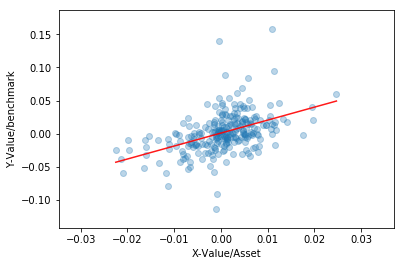

In [11]:
linreg(benchmark_ret,tsla_ret)

In [13]:
def linreg1(X,Y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y,X).fit()
    a = model.params[0]
    b= model.params[1]
    X = X[:,1]
    X2 = np.linspace(X.min(),X.max(),100)
    Y_hat = a + b*X2
    plt.scatter(X,Y,alpha=0.3)
    plt.plot(X2,Y_hat,'r',alpha=0.9)
    plt.xlabel('X-Value/Asset')
    plt.ylabel('Y-Value/benchmark')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1360
Date:                Wed, 18 Sep 2019   Prob (F-statistic):              0.713
Time:                        10:26:27   Log-Likelihood:                -10.302
No. Observations:                 100   AIC:                             24.60
Df Residuals:                      98   BIC:                             29.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5587      0.054     10.340      0.000       0.451       0.666
x1            -0.0349      0.095     -0.369      0.713      -0.223       0.153
==============================================================================
Omnibus:                       14.524   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.731
Skew:                          -0.186   Prob(JB):                       0.0939
Kurtosis:                       2.001   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

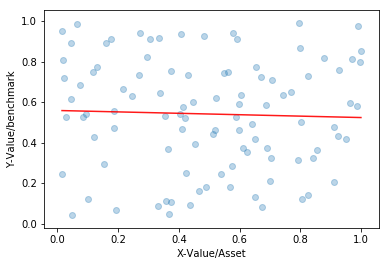

In [15]:
d1 = np.random.rand(100)
d2 = np.random.rand(100)
linreg1(d2,d1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     254.4
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           5.53e-29
Time:                        10:30:28   Log-Likelihood:                 53.611
No. Observations:                 100   AIC:                            -103.2
Df Residuals:                      98   BIC:                            -98.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1703      0.027      6.235      0.000       0.116       0.225
x1             0.6758      0.042     15.948      0.000       0.592       0.760
==============================================================================
Omnibus:                        1.622   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                1.328
Skew:                          -0.091   Prob(JB):                        0.515
Kurtosis:                       2.466   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

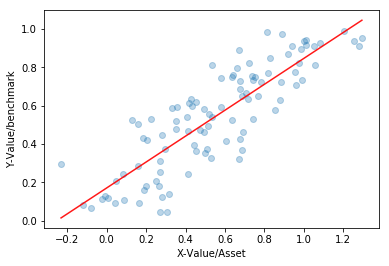

In [16]:
d2 = d1 + 0.2*np.random.randn(100)
linreg1(d2,d1)

In [17]:
import seaborn

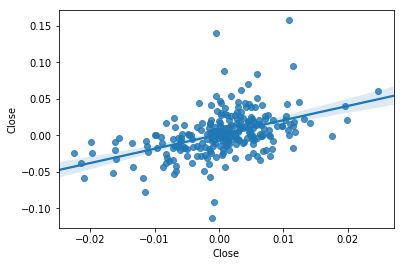

In [19]:
seaborn.regplot(benchmark_ret,tsla_ret);